# Introduction

## Pricing assets by assuming random walks

1. In the 1960s and 1970s the daily log returns of stocks have been observed to follow a `close to normal distribution`.
<br/>
This triggered the construction of stochastic models, both discrete and continuous.


2. The binomial tree model is built on a discrete time random walk.
<br/>
The Black-Scholes model is built on the generalized Wiener process,<br/>
which is a continuous time limiting case of a random walk.


3. Both models have been very successful in pricing derivatives when the underlying asset moves not too far.
<br/>
Their major limitation is their assumption about the absence of correlations in the stochastic process that they are built on.

## Markovian process and Martingale

###### Markovian process

A random process in which the next step depends only on the current state, not on any past states. 

###### Martingale

A random process in which the expectation value at the next time step equals the value at the current time step.

## Bernoulli distribution and the Central Limit Theorem

###### Bernoulli distribution

With probability $\,0<p<1\,$ select $\,1\,$, and with probability $\,1-p\,$ select $\,0\,$. 

###### Central Limit Theorem

If you select $\,n\to\infty\,$ times independently with equal probability either $\,+1\,$ or $\,-1\,$,
<br/>
then the central $\,\sqrt{n\,}\,$ wide region of the resulting distribution will converge sufficiently well to a normal distribution. 

Note that after $\,n\,$ steps the lowest and highest possible positions of the random walk are $\,-n\,$ and $\,n\,$.

###### Task

Map the Bernoulli distributed steps to the symmetrically distributed $\,+1\,$ and $\,-1\,$ steps.

## Arbitrage and Risk-neutral pricing

* `Arbitrage` means that different paths between the same two end points can give determinstically different profits.
<br/>
Example (FX arbitrage): exchanging 1 USD $\rightarrow$ EUR $\rightarrow$ GBP always brings you more than 1 USD $\rightarrow$ GBP 


* In an ideal world: all information is immediately available to everyone, so there is no arbitrage.


* `Risk-neutral pricing`:
  * The PV is <b>calculated by</b> as a probability-weighted sum (discounting) of all future possible values.
  * For example, no additional premium is applied for high volatility / risk.

## European call option, terminology, notations
 
A call option is an agreement that gives an investor the right, but not the obligation, to buy the underlying for the strike price at the date of maturity.

* Underlying asset
  - stock index, futures, commodity, currency, index
  - price of the derivative is based on the underlying

* Maturity
  - date on which the life of a financial instrument ends
  - also called: date of expiry

* Price of underlying
  - price of underlying now: $S_{\ 0}$
  - at maturity: $S_{\ T}$
  - price of the underlying at time $\,t\,$ is $\,S_{\ t}$

* Price of option:
  - also called: premium that you pay for the option
  - the amount you pay when you buy an option
    - note: selling the option is also called "writing" the option

* "Moneyness" at a selected time point
  - ATM (at the money): $\ S_{\ t}=K$
  - Out of the money (of a call option): $\ S_{\ t}<K$
  - In the money (call option): $\ S_{\ t}>K$

* Intrinsic value of an option
  - At time $\ t\ $ this is the signed amount by which the option is in the money or out of the money: $\ S_{\ t} - K $

* Possible excercise dates are described with geographical terms:
  - European: can be exercised only at the date of expiry
  - American: can be excercised at any time point between the date of the contract and the date of the expiry
  - Bermudian: fixed dates
  
* Payoff
  - The amount that the writer pays to the buyer at the time of maturity:  $\ \max(\ S_{\ T} - K,\ 0\ ) $

![Call option payoff](./img/call-payoff.png "Call option payoff")

## Vanilla options vs Exotic options

###### Vanilla

The option's payoff depends **only** on the underlying's start price and end price.<br/>
In other words: the underlying's spot price and its price at maturity.

###### Exotic

The price of the option depends also on intermediate prices of the underlying.<br/>
In other words: the path of underlying matters too.

###### Example

*A (binary) Vanilla option*

Today Alesia calls her friends, and they agree that if the weather is nice next Sunday, then they will have icecream.

*A (knock-out) Exotic option*

If the weather is nice next Sunday, and Alesia does not catch a cold **during the week**, then she will have an icecream.

###### Theoretical illustration

<br/>

<center>
    <img src="./img/vanilla-exotic.png" width="600" alt="Comparison of Vanilla options and Exotic options">
    <br/>
    Comparison of Vanilla options and Exotic options
</center>

# European call option

## Binomial tree model for option pricing

Discretized version of continuous time process: 
- at each time step the price of the underlying goes either `up or down`
- with an increasing number of steps (tree size), the tree's results converge to the continuous results (Black-Scholes)
- many-step binomial tree's center approximates well the center of the lognormal distribution
  - see: random walk up vs down with probabilities $\ p\ $ vs $\ (1-p)\ $
- real price change distributions are often close to lognormal
  - main corrections to this will come after Black-Scholes-Merton pricing of call option
  
### Binomial tree pricer for a European call option

We will calculate with the binomial tree pricer the Present Value (PV) of a European call option on an underlying stock. 

We will use the following main assumptions: 
* The option's underlying stock pays no dividends.
* There are no taxes or other fees associated with selling or buying the underlying.
* We can determine the risk-free rate, and it is constant.
* Everyone in the market uses risk-neutral pricing:
  * The PV of a future event is a linear combination of the values<br/>of that event's possible outcomes discounted with risk-free rate. 
  * The linear combination coefficients are the probabilities of the outcomes.
* Any amount of the underlying can be purchased or sold at any time at zero cost.

###### Refresher Questions
* What is the future event for which we are calculating the PV here ?
* What are the possible outcomes of that future event ?
* What are the probabilities of those future outcomes ?
* Is the European call option a vanilla option or an exotic option ?

## One-step binomial tree

`Risk-neutral` pricing of a European call option on a non-dividend paying underlying stock

1. Make reasonable assumptions, in other words: set up a model.
2. With this model calculate the call option's expected payoff (which will happen at maturity).
3. Discount this calculated payoff to the present to obtain the current fair value.

###### Definitions / Notations

At time $\,t=0\,$
* the price of the underlying stock is $\,S_{\,0}\,$,
* the risk-free rate is $\,r\,$,
* we know how to discount the payoff at maturity (time $\,T\,$) to the current time ($\,t=0\,$).

###### Model description (S underlier price, f: option price)

To calculate the `current Fair Value`, $\,f\,$, of the call option's payoff (which will happen at maturity), we select 
<br/>
the simplest non-trivial simplification for the time evolution of the stock with the parameters $\,0<d<1<u\,$:
* with probability $\,0<p<1\,$ the price will go up to $\,u\,S_{\,0}\,$ 
* and with probability $\,1-p\,$ the price will go down to $\,d\,S_{\,0}\,$

Denote by $\,f_u\,$ the option's payoff in the "u" (up) final state, and by $\,f_d\,$ in the lower (down) final state.

<br/>

<center>
    <img src="./img/binom.png" width="300" alt="The one-step binomial tree pricer model">
    <br/>
    One-step binomial tree pricer model with a
    <br/>
    European call option on a non-dividend-paying underlying stock.
</center>

###### What is the meaning of the parameters $\,u\,$ and $\,d\,$ ?

Assume that we know from a recent time window the stock's past growth rate, $\,m\,$, and volatility, $\,\sigma\,$.

The values  $\,d\,S_{\,0}\,$ to $\,u\,S_{\,0}\,$ should include the range of the stock's price at maturity.
<br/>
With the previously known $\,m\,$ and $\,\sigma\,$ values, this can be written as the following two conditions:
<br/>
$\,\,\,\,$ $d\,S_{\,0} < \,S_{\,0} + m\,T - \sigma\,\sqrt{T\,}\,$ $\,\,$ and $\,\,$  $\,S_{\,0} + m\,T + \sigma\,\sqrt{T\,} < u\,S_{\,0}\,$.


###### Reducing the number of parameters

1. From this point on, let's use  $ \,u\,\cdot\,d=1\,$, in other words, $\,\color{red}{d=u^{\,-1}}\,$.


2. In this simplest form, the binomial tree model contains no additional information about the underlying stock, 
<br/>
therefore, the stock's expectation value grows with the `risk-free rate`. Moreover, we are using the `risk-neutral metric`,
<br/>
so the present value equals the (risk-free rate) discounted, probability-weighted sum of final values:
<br/>  
$\,p\,u\,S_{\,0} + \left(\,1-p\,\right)\,d\,S_{\,0}=S_{\,0}\,e^{\,r\,T}\,$.
<br/>
For the "step up" probability, $\,p\,$, this gives: 
$\,\color{red}{\displaystyle{p=\frac{e^{\,r\,T}-d}{u-d}}}\,$.


###### Solution

At maturity, if we are in the upper state (node), then the payoff is $\,f_u=\max\left(\,0\,,\,u\,S_{\,0}-K\,\right)\,$,
<br/>
and in the lower node the payoff at maturity is $\,f_d=\max\left(\,0\,,\,d\,S_{\,0}-K\,\right)\,$.


According to the model, going to the upper node (or lower node) has a probability of $\,p\,$ (or $\,1-p\,$) ,
<br/>
so the expected payoff at maturity is $\,p\,f_u + \left(\,1-p\,\right)\,f_d\,$.


Discounting this payoff from time $\,T\,$ (maturity) to now (time $\,t=0\,$) gives the call option's value:
<br/>
$\color{red}{f=\big(\,p\,f_u + \left(\,1-p\,\right)\,f_d\,\big)\,e^{\,-\,r\,T\,}}\,$.

### Pricer function

###### Tasks
1. With very small or very large  $\,r \cdot T\,$  how much do you think the price of the option will be ?  
2. What does  $\,e^{\,r\,T\,} > u\,$  mean ? Is it meaningful ? Why ?


In [1]:
import numpy as np


def call_option_price_one_step_binomial_tree(S0=None, K=None, u=None, rT=None):
    """
    Risk-neutral pricing with a one-step binomial tree:
    European call option on a non-dividend paying underlying stock

    S0:        current stock price, also called: spot price
    K:         strike price
    u:         stock price multiplier for the upper end node, has to be above 1
    d = 1/u:   multiplier for the lower end node
    rT:        the constant risk-free rate multiplied by the time to maturity given in year fractions

    returns:   p: the probability of going up in the model, f: present value of the call option
    """

    # checking and setting values
    assert S0 > 0, 'spot has to be positive'
    assert K > 0, 'strike has to be positive'
    assert u > 1, 'u has to be > 1'
    d = 1.0 / u
    assert 0 < d < 1 , 'd has to be between 0 and 1'
    assert rT >= 0, 'r * T has to be zero or positive'
    assert u > np.exp(rT), 'u must be above exp(r * T)'
    
    # option payoffs in the two final states
    f_d = max(0.0, d * S0 - K)
    f_u = max(0.0, u * S0 - K)

    # p: probability of going up, f: present value of the option
    p  = (np.exp(rT) - d) / (u - d)
    assert 0.0 < p < 1.0, 'p has to be between 0 and 1'
    f  = (p * f_u + (1 - p) * f_d) * np.exp(- 1.0 * rT)

    return {'p': p, 'f': f} 


def test_call_option_price_one_step_binomial_tree():
    for _ in [{'S0': 1.0, 'K': 10, 'u': 1.5, 'rT': 0.1, 'n': 1, 'expected_result': 0.0},
              {'S0': 1.0, 'K': 1.04, 'u': 1.05, 'rT': 0.01, 'n': 6, 'expected_result': 0.005849}]:
        f = round(call_option_price_one_step_binomial_tree(S0=_['S0'], K=_['K'], u=_['u'], rT=_['rT'])['f'], _['n'])
        print('test ok' if _['expected_result'] == f else 'test failed, wrong price: {}'.format(f))


test_call_option_price_one_step_binomial_tree()

test ok
test ok


### Plotting Option price vs Spot
###### Tasks

1. What is the slope of the option price vs spot price curve for large spot price values ?

2. What is the meaning of a negative $\,r \cdot T\,$ value ?

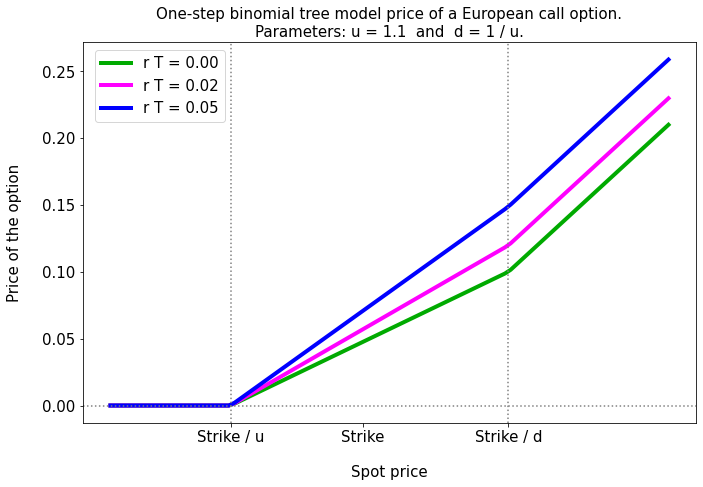

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot_one_step_binom_call_price_vs_spot():
    """"
    Price of call option with the one-step binomial tree pricer as a function of the underlier's spot price.
    """

    # --- parameters ---
    u = 1.1
    d = 1.0 / u 
    K = 1.0
    S0_list = np.linspace(K * d * d, K * u * u, 100)
    T = 1.0
    r_list = 0.0, 0.02, 0.05
    color_list = '#00aa00', 'magenta', 'blue'
    my_fontsize = 15
    line_width = 4
    figsize = (11, 7)
    label_padding = 20
    
    # --- plotting ---
    plt.figure(figsize=figsize)
    for r, current_color in zip(r_list, color_list):
        option_prices = [call_option_price_one_step_binomial_tree(S0=S0, K=K, u=1.1, rT=r*T)['f']
                         for S0 in S0_list]
        plt.plot(S0_list, option_prices, label='r T = {:.2f}'.format(r * T), color=current_color, lw=line_width)

    plt.legend(bbox_to_anchor=(.02, .98), loc=2, borderaxespad=0., fontsize=my_fontsize)
    plt.title('One-step binomial tree model price of a European call option.\n'
              'Parameters: u = {}  and  d = 1 / u.'.format(u), fontsize=my_fontsize)
    plt.xlabel('Spot price', fontsize=my_fontsize, labelpad=label_padding)
    plt.ylabel('Price of the option', fontsize=my_fontsize, labelpad=label_padding)
    plt.axvline(K / u, c='gray', ls='dotted')
    plt.axvline(K * u, c='gray', ls='dotted')
    plt.axhline(0, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K / u, K, K * u])
    ax.set_xticklabels(['Strike / u','Strike','Strike / d'], fontsize=my_fontsize)
    ax.tick_params(labelsize=my_fontsize)

    plt.show()


# plotting
plot_one_step_binom_call_price_vs_spot()

## Two-step binomial tree

###### Model description

Let's add another step to the time evolution of the underlier, so we now have two steps.

As before, $\,S\,$ is the price of the underlier, and $\,f\,$ is the price of the option.

<br/>

<center>
    <img src="./img/binom_2.png" width="450" alt="The two-step binomial tree pricer model">
    <br/>
    Two-step binomial tree pricer model for a European call option on a non-dividend-paying underlying stock.
</center>


###### Solution

1. We keep $\,r\,$ the same, and one step now covers only a time length of $\,T\,\mathit{/}\,2\,$,
<br/>
so the parameter $\,p\,$ contains a division in the exponent:

$$
\displaystyle{p=\frac{e^{\,r\,T\,\color{red}{\mathit{/}\,2}}-d}{u-d}}
$$


2. As in the previous case, we can calculate the option's payoff values at maturity: $\,f_{u\,u}\,,\,f_{u\,d}\,,\,f_{d\,d}\,$.


$$
f_{u\,u}=\max\left(\,0\,,\,u^{\,2}\,S_{\,0}-K\,\right)
\\
f_{u\,d}=\max\left(\,0\,,\,u\,d\,S_{\,0}-K\,\right)
\\
f_{d\,d}=\max\left(\,0\,,\,d^{\,2}\,S_{\,0}-K\,\right)
$$


3. From the payoffs at maturity, $\,2\,T\,$, we can calculate the $\,f_{u}\,$ and $\,f_{d}\,$ prices at $\,T\,$, and from those the current price, $\,f\,$.

$$
f_u=\big(\,p\,f_{u\,u} + \left(\,1-p\,\right)\,f_{u\,d}\,\big)\,e^{\,-\,r\,T\,\color{red}{{\mathit /}\,2}}
\\
f_d=\big(\,p\,f_{u\,d} + \left(\,1-p\,\right)\,f_{d\,d}\,\big)\,e^{\,-\,r\,T\,\color{red}{{\mathit /}\,2}}
$$
<br/><center>and</center>
$$
f=\big(\,p\,f_u + \left(\,1-p\,\right)\,f_d\,\big)\,e^{\,-\,r\,T\,\color{red}{{\mathit /}\,2}}
$$


4. Substituting $\,f_u\,$ and $\,f_d\,$ into $\,f\,$ gives

$$
\color{red}{f=e^{\,-\,r\,T}\,\big(\,p^{\,2}f_{u\,u} + 2\,p\,\left(\,1-p\,\right)\,f_{u\,d} +  \left(\,1-p\,\right)^{\,2}\,f_{d\,d}\,\big)}
$$


### Pricer function with two-step tree

In [3]:
import numpy as np


def call_option_price_two_step_binomial_tree(S0=None, K=None, u=None, rT=None):
    """
    Risk-neutral pricing with a two-step binomial tree:
    European call option on a non-dividend paying underlying stock

    S0:        current stock price, also called: spot price
    K:         strike price
    u:         stock price multiplier for the upper end node, has to be above 1
    d = 1/u:   multiplier for the lower end node
    rT:        the constant risk-free rate multiplied by the time to maturity given in year fractions

    returns:   p: the probability of going up in the model, f: present value of the call option
    """

    # checking and setting values
    assert S0 > 0, 'spot has to be positive'
    assert K > 0, 'strike has to be positive'
    assert u > 1, 'u has to be > 1'
    d = 1.0 / u
    assert 0 < d < 1 , 'd = 1/u must be between 0 and 1'
    assert rT >= 0, 'r * T has to be zero or positive'
    assert u > np.exp(rT), 'u must be above exp(r * T)'
    p  = (np.exp(0.5 * rT) - d) / (u - d)
    assert 0.0 < p < 1.0, 'p has to be between 0 and 1'

    # option payoffs at end nodes
    f_uu = np.maximum(0.0, u * u * S0 - K)  # option payoff at the top end state (node), reached by going up twice
    f_ud = np.maximum(0.0, u * d * S0 - K)  # option payoff at the middle end node
    f_dd = np.maximum(0.0, d * d * S0 - K)  # option payoff at the bottom end node

    # option price
    f  = np.exp(- 1.0 * rT) * (p * p * f_uu + 2.0 * p * (1.0 - p) * f_ud + (1.0 - p) * (1.0 - p) * f_dd)

    return {'p': p, 'f': f}


# baseline
assert 0.04108 == round(call_option_price_two_step_binomial_tree(S0=1.0, K=1.0, u=1.05, rT=0.03)['f'], 5)

### Plotting Option price vs Spot with 1-step and 2-step tree

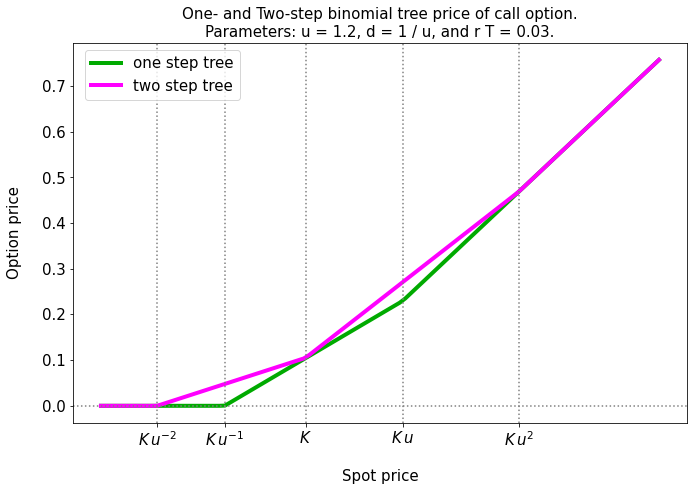

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def plot_one_step_two_step_binom_call_price_vs_spot():
    """"
    Price of call option with the one-step binomial tree and the two-step binomial tree pricer 
    as a function of the underlier's spot price.
    """

    # --- parameters ---
    u = 1.2
    K = 1.0
    S0_list = np.linspace(K * u**(-3.0), K * u**3.0, 100)
    rT = 0.03
    colors = {'one-step': '#00aa00', 'two-step': 'magenta'}
    my_fontsize = 15
    line_width = 4
    figsize = (11, 7)
    label_padding = 20
    
    # --- plotting ---
    plt.figure(figsize=figsize)
    option_prices_one_step = [call_option_price_one_step_binomial_tree(S0=S0, K=K, u=u, rT=rT)['f'] for S0 in S0_list]
    plt.plot(S0_list, option_prices_one_step, label='one step tree', color=colors['one-step'], lw=line_width)
    option_prices_two_step = [call_option_price_two_step_binomial_tree(S0=S0, K=K, u=u, rT=rT)['f'] for S0 in S0_list]
    plt.plot(S0_list, option_prices_two_step, label='two step tree', color=colors['two-step'], lw=line_width)

    plt.legend(bbox_to_anchor=(.02, .98), loc=2, borderaxespad=0., fontsize=my_fontsize)
    plt.title('One- and Two-step binomial tree price of call option.\n'
              'Parameters: u = {}, d = 1 / u, and r T = {}.'.format(u, rT), fontsize=my_fontsize)
    plt.xlabel('Spot price', fontsize=my_fontsize, labelpad=label_padding)
    plt.ylabel('Option price', fontsize=my_fontsize, labelpad=label_padding)
    plt.axvline(K / (u * u), c='gray', ls='dotted')
    plt.axvline(K / u, c='gray', ls='dotted')
    plt.axvline(K, c='gray', ls='dotted')
    plt.axvline(K * u, c='gray', ls='dotted')
    plt.axvline(K * u * u, c='gray', ls='dotted')
    plt.axhline(0, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K / (u * u), K / u, K, K * u, K * u * u])
    ax.set_xticklabels(['$K\,u^{-2}$', '$K\,u^{-1}$','$K$', '$K\,u$', '$K\,u^2$'], fontsize=my_fontsize)
    ax.tick_params(labelsize=my_fontsize)

    plt.show()


plot_one_step_two_step_binom_call_price_vs_spot()

## The _n_-step binomial tree
for the risk-neutral calculation of the price of a European call option on a non-dividend-paying underlying stock

### Binomial coefficients, Binomial distribution

Consider an $\,n\,$-step binomial tree without the $\,p\,$ and $\,\left(\,1-p\,\right)\,$ probabilities.

In how many different ways (along how many different paths) can you reach the uppermost final node? 
<br/>
There is exactly one path leading to the top node. You have to move up at each of the $\,n\,$ steps.

How many different paths lead from the start node to the end node that is the second from the top?
<br/>
There are $\,n\,$ such paths. From the $\,n\,$ steps you have to select $\,1\,$ when you go down, and at all the other $\,n-1\,$ steps you go up.

In how many different ways can you reach the final node that is the  $\,k\,$th from the top ? Note that $\,0<k<n\,$.
<br/>
You have to select $\,k\,$ steps from the total of $\,n\,$ steps when you go down, and in the other $\,n-k\,$ steps you will go up.
<br/>
In other words, from the numbers $\,1\,,\,2\,,\,\dots\,,\,n\,$ you have to select $\,k\,$ different numbers for going down.
<br/>
You can do this in $\,\displaystyle{\binom{n}{k}}\,$ ways, this is the called the binomial coefficient.

Now include the $\,p\,$ and $\,\left(\,1-p\,\right)\,$ probabilites along the arrows.
<br/>
Thus, the probability of reaching the end node that is the $\,k\,$th from the top is
<br/>
$\displaystyle{\mathrm{Prob}\left(\,p,\,n,\,k\,\right)=\binom{n}{k}\ p^{\ k}\ \left(1-p\right)^{\ n\ -\ k}}$

This $\,\mathrm{Prob}\left(\,p,\,n,\,k\,\right)\,$ is the binomial distribution.
The expectation value (mean) of this distribution is $\,p\,n\,$.


Note that in the $\,\{\,n\,\rightarrow\infty\,,\,p\,n\rightarrow\,\mathrm{const}.\,\}\,$ limit 
the center of this distribution around $\,p\,n\,$ converges to the normal distribution.

### Parameters and Graphical explanation of the model

Note that $\,T\,\mathit{/}\,n\,$ appears differently in the rescaling of time and volatility.

Set the length of time step to $\,T\,\mathit{/}\,n\,$,
and denote the risk-free rate and the volatility by $\,r\,$ and $\,\sigma\,$.

Set the ratio for moving up to $\,u=\exp \left(\,\sigma\,\sqrt{\,T\,\mathit{/}\,n\,}\,\right)\,$
and the ratio for moving down to $\,d=\,u^{\,-1}\,$.

Consequently, the
probability of moving up is $\,\displaystyle{p=\frac{\exp\,\!\left(\,r\,T\,\mathit{/}\,n\,\right)-d}{u-d}}\,$,
and the price of the option is

$$
\,\displaystyle{ f = \sum_{k=0}^n\, \binom{n}{k}\ p^{\ k}\ \left(1-p\right)^{\ n\ -\ k} \,\,
\max\left(\,0\,,\,u^{\ n\ -\ k}\,d^{\ k}\,S_{\ 0} - K\, \right) }
\,
.$$


Note that this sum can be written as the dot product of two $\,\left(\,n+1\,\right)\,$ dimensional vectors:
<br/>
1. the first vector contains the binomial probabilities
2. the second vector contains the final payoff values

Note also that with the above $\,d=\,u^{\,-1}\,$ choice this is the `Cox-Ross-Rubinstein (CRR)` method for option pricing.

<br/>

<center>
    <img src="./img/binom_n.png" width="700" alt="The n-step binomial tree pricer model">
    <br/>
    The $\,n\,$-step binomial tree pricer model for a European call option on a non-dividend-paying underlying stock.
</center>

###### Example: Binomial coefficients

In [3]:
from scipy import special


def test_binom_coeffs(n=None):
    """Test binomical coefficients"""

    if n is not None:
        for i in range(n + 1):
            print('{} atop {} = {}'.format(n, i, int(special.binom(n, i))))
            
            
test_binom_coeffs(n=4)

4 atop 0 = 1
4 atop 1 = 4
4 atop 2 = 6
4 atop 3 = 4
4 atop 4 = 1


### Pricer function

In [4]:
import numpy as np
from scipy import special


def call_option_price_n_step_normalized_binomial_tree(S0=None, K=None, sigma=None, r=None, T=None, n=None):
    """"
    Binomial tree pricer with n steps calculating the risk-neutral price 
    of a European call option on a non-dividend-paying underlying stock

    S0:     current stock price, also called: spot price
    K:      strike price of the option
    sigma:  volatility of the underlying stock
    r:      the constant risk-free short rate
    T:      time to maturity given in year fractions
    n:      number of time steps

    returns:  p: model probability, f: option price
    """
    
    # --- checking and setting values ---
    assert S0 > 0, 'spot has to be positive'
    assert K > 0, 'strike has to be positive'
    u = np.exp(sigma * np.sqrt(T / n))
    assert u > 1, 'u has to be > 1'
    assert 0 < 1.0 / u < 1 , 'd = 1/u has to be between 0 and 1'
    assert r * T >= 0, 'r * T has to be zero or positive'
    assert sigma >=0, 'sigma has to be non-negative'
    p  = (u * np.exp(r * T / n) - 1.0) / (u * u - 1.0)  # probability of going up
    assert 0.0 < p < 1.0, 'p has to between 0 and 1'
    
    # --- calculations ---    
    # option payoff values at the (n + 1) end nodes, indexing of the nodes starts from the top
    # note that u^{n-k} * d^k = u^{n-2k}
    f_end = [np.maximum(0.0, np.power(u, n - 2 * k) * S0 - K ) for k in range(n + 1)]

    # probabilities of the end nodes, note that indexing starts from the top and special.binom(n,k)=(n atop k)
    binomial_dist = [special.binom(n, k) * np.power(p, n - k) * np.power(1.0 - p, k) for k in range(n + 1)]
                
    # current option price
    f = np.exp((-1.0) * r * T) * np.dot(f_end, binomial_dist)

    return {'p': p, 'f': f}

### Plotting Option price vs Strike

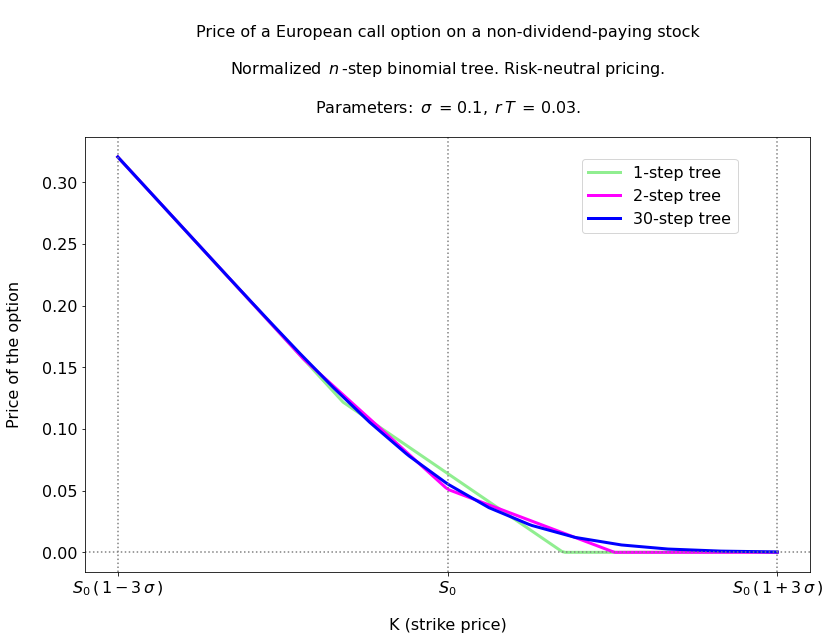

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N_LIST = 1, 2, 30
COLOR_LIST = 'lightgreen', 'magenta', 'blue'


def plot_n_step_binom_call_price_vs_spot(n_list=None, color_list=None):
    """
    Plot call option price calculated with binomial trees of the listed sizes
    n_list:      list of binomial tree sizes
    color_list:  list of colors for plotting
    """
        
    # --- checking arguments ---
    assert isinstance(n_list, (list, tuple)), 'n_list has to be a list or tuple'
    assert isinstance(color_list, (list, tuple)), 'color_list has to be a list or tuple'
    assert len(n_list) == len(color_list), 'n_list and color_list must have the same length'

    # --- setting parameters ---
    S0 = 1  # initial spot price of the underlying stock
    T = 1.0  # time to maturity in year fractions
    sigma = 0.1  # volatility of the underlying stock
    r = 0.03  # risk-free rate
    K_min, K_max = S0 * (1 - 3 * sigma), S0 * (1 + 3 * sigma) 
    K_values = np.linspace(K_min, K_max, 200)
    my_fontsize = 16
    linewidth = 3
    labelpad = 20

    # --- plotting ---
    plt.figure(figsize=(13, 8)) # resizing the figure
    for color, n in zip(color_list, n_list):
        f_list = [call_option_price_n_step_normalized_binomial_tree(S0=S0, K=K, sigma=sigma, r=r, T=T, n=n)['f']
                  for K in K_values ]
        plt.plot(K_values, f_list, label='{}-step tree'.format(n), color=color, linestyle='-', lw=linewidth)
    plt.legend(bbox_to_anchor=(0.9, .95), loc=1, borderaxespad=0., fontsize=my_fontsize)
    plt.title('\nPrice of a European call option on a non-dividend-paying stock\n\n'
              'Normalized $\,n\,$-step binomial tree. Risk-neutral pricing.\n\n'
              'Parameters: $\,\sigma\,$ = {:.1g}, $\,r\,T\,$ = {}.\n'.format(sigma, r * T), fontsize=my_fontsize)
    plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=labelpad)
    plt.ylabel('Price of the option', fontsize=my_fontsize, labelpad=labelpad)
    plt.tick_params(labelsize=my_fontsize)
    plt.axhline(0, c='gray', ls='dotted')
    plt.axvline(K_min, c='gray', ls='dotted')
    plt.axvline(S0, c='gray', ls='dotted')
    plt.axvline(K_max, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K_min, S0, K_max])
    ax.set_xticklabels([r'$S_0\,\left(\,1-3\,\sigma\,\right)$', '$S_0$', r'$S_0\,\left(\,1+3\,\sigma\,\right)$'], 
                       fontsize=my_fontsize) 

    plt.show()

    
plot_n_step_binom_call_price_vs_spot(n_list=N_LIST, color_list=COLOR_LIST)

### Plotting with different rates and volatilities

###### Tasks

1. How does the price of the call option change with growing risk-free rate ?
2. How does it change with growing volatility ?

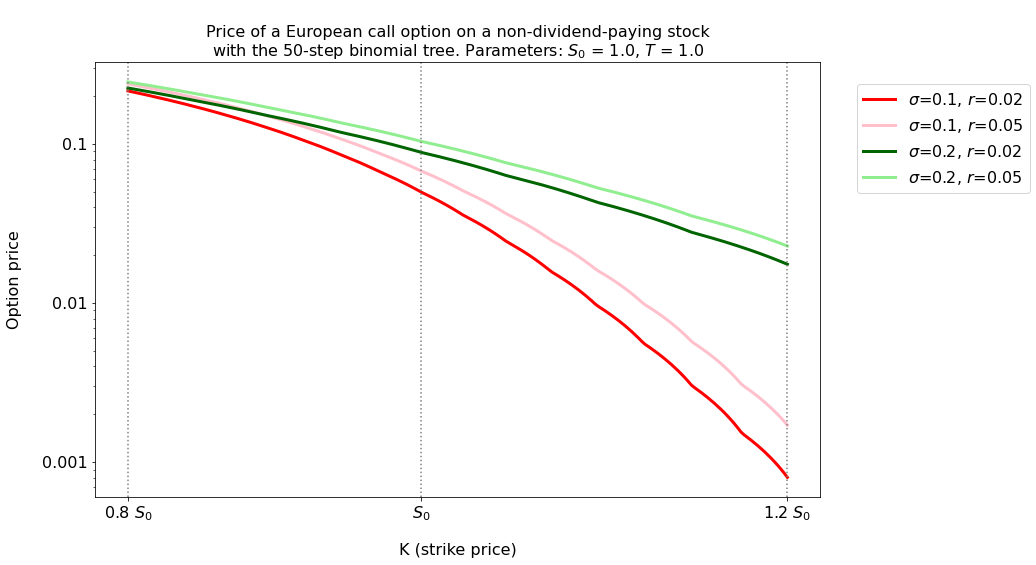

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FormatStrFormatter # for the semilog plot

R_SIGMA_LIST = ((.02, .1), (.05, .1), (.02, .2), (.05, .2))  # list of pairs: risk-free rate, volatility
COLOR_LIST = 'red', 'pink', 'darkgreen', 'lightgreen'  # colors for plotting


def plot_call_option_prices_with_different_rates_volatilities(r_sigma_list=None, color_list=None):
    """
    Plot the price of the European call option with an n-step binomial tree
    with different risk-free rates and volatilities

    r_sigma_list:  list of risk-free rate, volatility pairs
    color_list:    list of colors for plotting the payoff curves
    """

    # --- checking arguments ---
    assert isinstance(r_sigma_list, (list, tuple)), 'r_sigma_list has to be a list or tuple'
    assert isinstance(r_sigma_list[0], (list, tuple)), 'r_sigma_list[0] has to be a list or tuple'
    assert isinstance(color_list, (list, tuple)), 'color_list has to be a list or tuple'
    assert len(r_sigma_list) == len(color_list), 'r_sigma_list and color_list must have the same length'
    
    # --- setting parameters ---
    T = 1.0  # time to maturity of the option (in years)
    n = 50  # tree depth: number of steps of the binomial tree
    S0 = 1.0  # current stock price
    K_min_over_S0, K_max_over_S0 = 0.8, 1.25
    n_K_values = 200
    my_fontsize = 16
    figure_size = (13, 8)
    linewidth = 3

    K_min, K_max = K_min_over_S0 * S0, K_max_over_S0 * S0
    K_values = np.linspace(K_min, K_max, n_K_values)  # strike price values to apply

    # --- plotting ---
    plt.figure(figsize=figure_size)
    for color, (r, sigma) in zip(color_list, r_sigma_list):
        f_list = [call_option_price_n_step_normalized_binomial_tree(S0=S0, K=K, sigma=sigma, r=r, T=T, n=n)['f']
                  for K in K_values ]
        plt.semilogy(K_values, f_list, label='$\sigma$={}, $r$={}'.format(sigma, r), 
                     color=color, linestyle='-', lw=linewidth)

    plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize)
    plt.title('\nPrice of a European call option on a non-dividend-paying stock\n'
              'with the {}-step binomial tree. Parameters: $S_0$ = {}, $T$ = {}'
              .format(n, S0, T), fontsize=my_fontsize)
    plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=20) # horizontal axis label
    plt.ylabel('Option price', fontsize=my_fontsize, labelpad=20) # horizontal axis label
    plt.tick_params(labelsize=my_fontsize) # tick text font size
    plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
    plt.axvline(K_min, c='gray', ls='dotted')
    plt.axvline(S0, c='gray', ls='dotted')
    plt.axvline(K_max, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K_min, S0, K_max])
    ax.set_xticklabels([r'{:.2g} $S_0$'.format(K_min_over_S0), r'$S_0$', r'{:.2g} $S_0$'
                        .format(K_max_over_S0)], fontsize=my_fontsize)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g')) # for the semilog plot

    plt.show()

    
plot_call_option_prices_with_different_rates_volatilities(r_sigma_list=R_SIGMA_LIST, color_list=COLOR_LIST)

# Pricing American options with the binomial tree

`European` option: can be exercised only at maturity. `American` option: can be exercised at any time step.

## Example and Graphical explanation

At the highlighted node the value of the option is the maximum of two possible prices:
1. the price when you decide to `hold` the option
2. the price when you decide to `exercise` the option

With an American option you are `free to decide` between these two possibilities
<br/>
`at each non-terminal node` of the binomial tree.

<br/>

<center>
    <img src="./img/binom_american_example.png" width="600">
    <br/>
    Decision at a node while pricing an American put option with a two-step binomial tree.
</center>

## Binomial tree pricer of an American or European call or put

In [4]:
import numpy as np
from scipy import special


def binom_tree_pricer_american_or_european_call_or_put(S0=None, K=None, sigma=None, r=None, T=None, n=None,
                                                       exercise_type=None, put_or_call=None):
    """
    Binomial tree pricer of an American or European call or put option
    
    S0:     current stock price, also called: spot price
    K:      strike price of the option
    sigma:  volatility of the underlying stock
    r:      the constant risk-free short rate
    T:      time to maturity given in year fractions
    n:      number of time steps used in the binomial tree pricer

    returns:  p: model probability, f: option price
    """

    # --- checking and setting values ---
    assert S0 > 0, 'spot has to be positive'
    assert K > 0, 'strike has to be positive'
    u = np.exp(sigma * np.sqrt(T / n))
    assert u > 1, 'u has to be > 1'
    assert 0 < 1.0 / u < 1 , 'd = 1/u has to be between 0 and 1'
    assert r * T >= 0, 'r * T has to be zero or positive'
    assert sigma >=0, 'sigma has to be non-negative'
    p  = (u * np.exp(r * T / n) - 1.0) / (u * u - 1.0)
    assert 0.0 < p < 1.0, 'p has to between 0 and 1, current values are: u={}, p={}'.format(u, p)
    
    # --- calculations ---
    # underlier value at each of the terminal  (n + 1)  nodes, indexing starts from the top 
    S = [np.power(u, n - 2 * k) * S0 for k in range(n + 1)]
    
    # option value at each of the terminal  (n + 1)  nodes, indexing starts from the top
    f = [max(0.0, S[k] - K if put_or_call == 'call' else K - S[k]) for k in range(n + 1)]
    
    # European option: option price can be directly calculated from the final payoff values
    if exercise_type == 'european':
        b = [special.binom(n, k) * np.power(p, n - k) * np.power(1.0 - p, k) for k in range(n + 1)]        
        option_price = np.exp((-1.0) * r * T) * np.dot(f, b)
    # American option: calculate stepwise back starting from the (n + 1) final states, decide at each node
    elif exercise_type == 'american':
        while len(f) > 1:  # from the option values calculate the option values one time step earlier
            for i in range(len(f) - 1):
                f_hold = np.exp((-1.0) * r * T / n) * (p * f[i] + (1.0 - p) * f[i + 1])  # option value when holding
                stock_value = np.power(u, len(f) - 1 - (2.0 * i)) * S0  # stock value in the current point of the tree
                f_exercise = max(0.0, stock_value - K if put_or_call == 'call' else K - stock_value)
                f[i] = max(f_hold, f_exercise)  # select the maximum of the two possible values
            f.pop()
        option_price = f[0]
    else:
        raise ValueError('Exercise type {} is currently not implemented'.format(exercise_type))
    
    return option_price


# one baseline value, no detailed testing
assert 0.019723 == round(binom_tree_pricer_american_or_european_call_or_put(
    S0=1, K=1, sigma=0.02, r=0.01, T=1, n=3, put_or_call='call', exercise_type='american'), 6)

## Plotting option prices vs Spot price of the underlying non-dividend paying stock

Price of an American or European call or put option vs the current price of the underlier.

###### Tasks

1. Check if the put-call parity holds for the European options.
2. Does the put-call parity hold for the American put and call options ? Why ?
3. What is the relationship between the price of a European and an American option with the same parameters ? Why ?

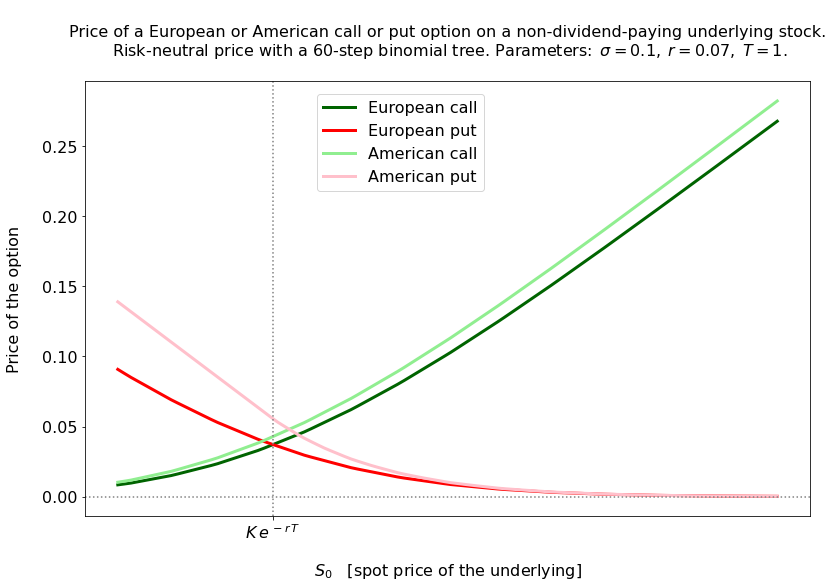

In [5]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

COLOR_LIST = 'darkgreen', 'red', 'lightgreen', 'pink'  # colors for plotting


def plot_am_eu_call_put(color_list=None):
    """
    Plot the price of an American / European call / put vs the Spot price of the underlying non-dividend paying stock
    """
    
    # --- checking and setting values ---
    assert isinstance(color_list, (list, tuple)), 'color_list has to be a list or tuple'
    assert len(color_list) == 4, 'color_list must have 4 items'
    
    r = 0.07  # risk-free rate
    T = 1.0  # time to maturity of the option (in years)
    sigma = 0.1  # constant volatility
    n = 60  # tree depth: number of levels of the binomial tree
    K = 1.0  # strike price of the option
    S0_min, S0_max = 0.85, 1.2
    n_S0_values = 100
    S0_list = np.linspace(S0_min, S0_max, n_S0_values)  # spot price values

    my_fontsize = 16
    figure_size = (13, 8)
    linewidth = 3
    labelpad = 20
    
    # --- plotting ---
    plt.figure(figsize=figure_size)
    for color, (exercise_type, put_or_call) in zip(color_list, product(('european', 'american'), ('call', 'put'))):
        f_list = [binom_tree_pricer_american_or_european_call_or_put(
                      S0=S0, K=K, sigma=sigma, r=r, T=T, n=n, put_or_call=put_or_call, exercise_type=exercise_type)
                  for S0 in S0_list]
        plt.plot(S0_list, f_list, label='{} {}'.format(exercise_type.capitalize(), put_or_call), color=color, 
                 linestyle='-', lw=linewidth)

    plt.legend(bbox_to_anchor=(0.55, .97), loc=1, borderaxespad=0., fontsize=my_fontsize)
    plt.title('\nPrice of a European or American call or put option on a non-dividend-paying underlying stock.\n'
              ' Risk-neutral price with a ${}$-step binomial tree. '.format(n) +
              'Parameters: $\,\sigma=${:.1g}, $\,r=${:.1g}, $\,T=${:.1g}.\n'.format(sigma, r, T), fontsize=my_fontsize)
    plt.xlabel('$S_0$   [spot price of the underlying]', fontsize=my_fontsize, labelpad=labelpad)
    plt.ylabel('Price of the option', fontsize=my_fontsize, labelpad=labelpad)
    plt.tick_params(labelsize=my_fontsize)
    plt.axhline(0, c='gray', ls='dotted')
    plt.axvline(K * np.exp(-r * T), c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K * np.exp(-r * T)])
    ax.set_xticklabels([r'$K\,e^{\,-r\,T}$'], fontsize=my_fontsize) 

    plt.show()

    
plot_am_eu_call_put(color_list=COLOR_LIST)    

# Recommended reading

* [Arrow securities](https://en.wikipedia.org/wiki/Risk-neutral_measure#The_origin_of_the_risk-neutral_measure_(Arrow_securities)) - Can be viewed as the possible states (outcomes) of the price of the underlying at maturity